###### The objective of this program is the following:
 
- Chart adjusted closing price
- Calculate daily and monthly returns
- Charting daily and monthly returns
- Histogram to get a sense of how extreme the returns can be 
- Calculate cumulative returns 


###### Activating code auto-complete

In [1]:
%config IPCompleter.greedy=True

###### Importing Libraries

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal

###### Extracting Data for one symbol from Yahoo Stocks Data API

In [151]:
market_data_1_symbol = web.get_data_yahoo("AAPL",
                            start = "2018-04-21",
                            end = "2020-04-21")
market_data_1_symbol

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-23,166.919998,164.089996,166.830002,165.240005,36515500.0,160.658752
2018-04-24,166.330002,161.220001,165.669998,162.940002,33692000.0,158.422516
2018-04-25,165.419998,162.410004,162.619995,163.649994,28382100.0,159.112808
2018-04-26,165.729996,163.369995,164.119995,164.220001,27963000.0,159.667007
2018-04-27,164.330002,160.630005,164.000000,162.320007,35655800.0,157.819687
...,...,...,...,...,...,...
2020-04-15,286.329987,280.630005,282.399994,284.429993,32788600.0,284.429993
2020-04-16,288.200012,282.350006,287.380005,286.690002,39281300.0,286.690002
2020-04-17,286.950012,276.859985,284.690002,282.799988,53812500.0,282.799988


###### Charting adjusted closing price

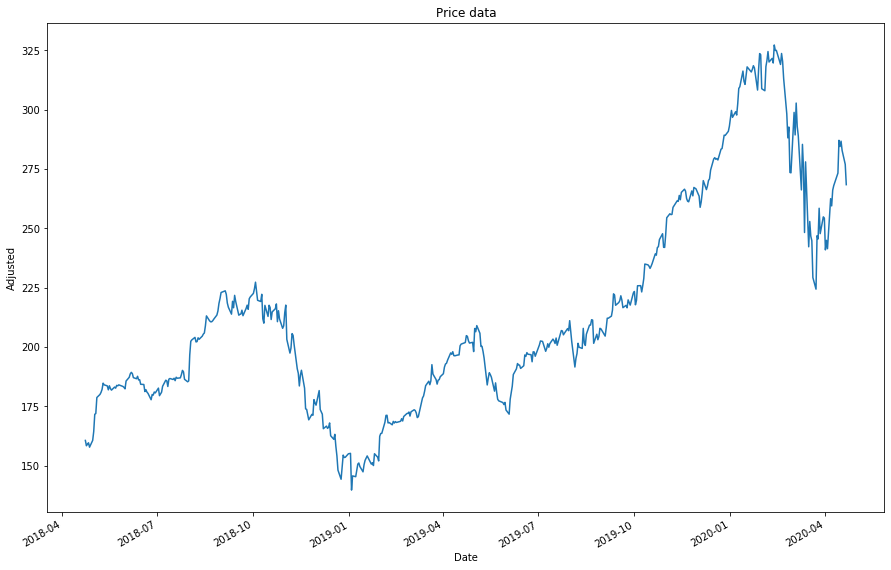

In [152]:
plt.figure(figsize=(15,10))
market_data_1_symbol['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Price data")
plt.show()

###### Calculating daily and monthly returns for individual stock

In [153]:
daily_returns = market_data_1_symbol['Adj Close'].pct_change()
daily_returns

Date
2018-04-23         NaN
2018-04-24   -0.013919
2018-04-25    0.004357
2018-04-26    0.003483
2018-04-27   -0.011570
                ...   
2020-04-15   -0.009127
2020-04-16    0.007946
2020-04-17   -0.013569
2020-04-20   -0.020757
2020-04-21   -0.030910
Name: Adj Close, Length: 503, dtype: float64

- Pandas dataframe. ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward.
- Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

In [154]:
monthly_returns = market_data_1_symbol['Adj Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2018-04-30         NaN
2018-05-31    0.135124
2018-06-30   -0.009418
2018-07-31    0.027983
2018-08-31    0.200422
2018-09-30   -0.008303
2018-10-31   -0.030477
2018-11-30   -0.181198
2018-12-31   -0.116698
2019-01-31    0.055154
2019-02-28    0.044777
2019-03-31    0.097026
2019-04-30    0.056436
2019-05-31   -0.124213
2019-06-30    0.130519
2019-07-31    0.076395
2019-08-31   -0.016461
2019-09-30    0.072962
2019-10-31    0.110684
2019-11-30    0.077554
2019-12-31    0.098784
2020-01-31    0.054010
2020-02-29   -0.114701
2020-03-31   -0.069761
2020-04-30    0.055370
Freq: M, Name: Adj Close, dtype: float64

###### Charting Daily and Monthly Returns for Netflix

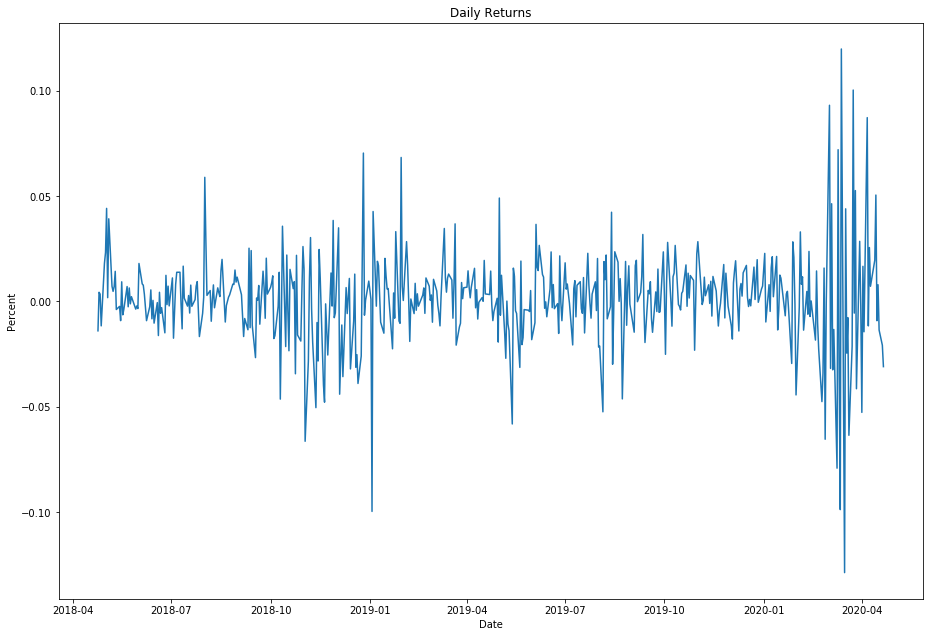

In [155]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

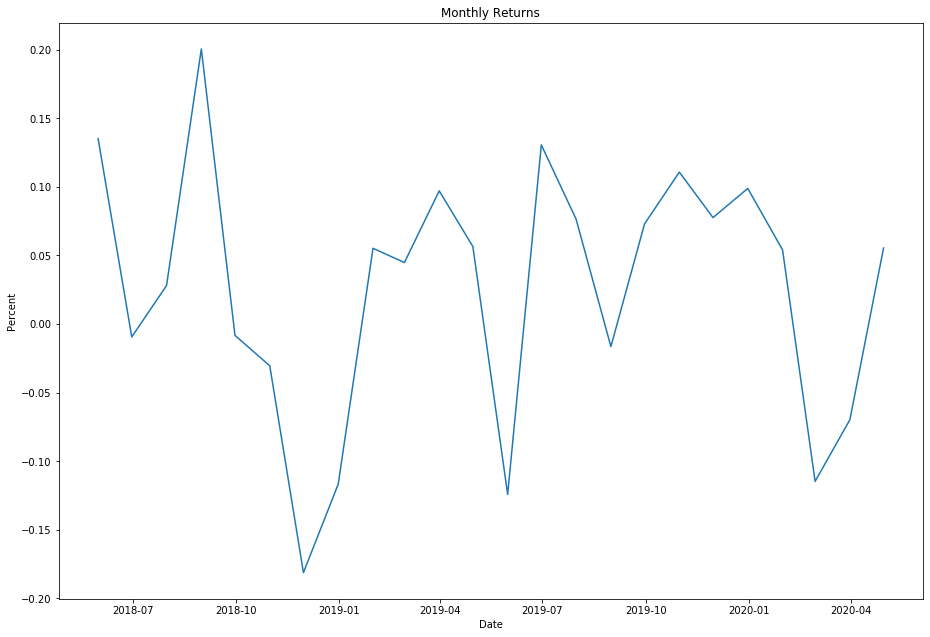

In [160]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
ax1.plot(monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Monthly Returns")
plt.show()

##### After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 10% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

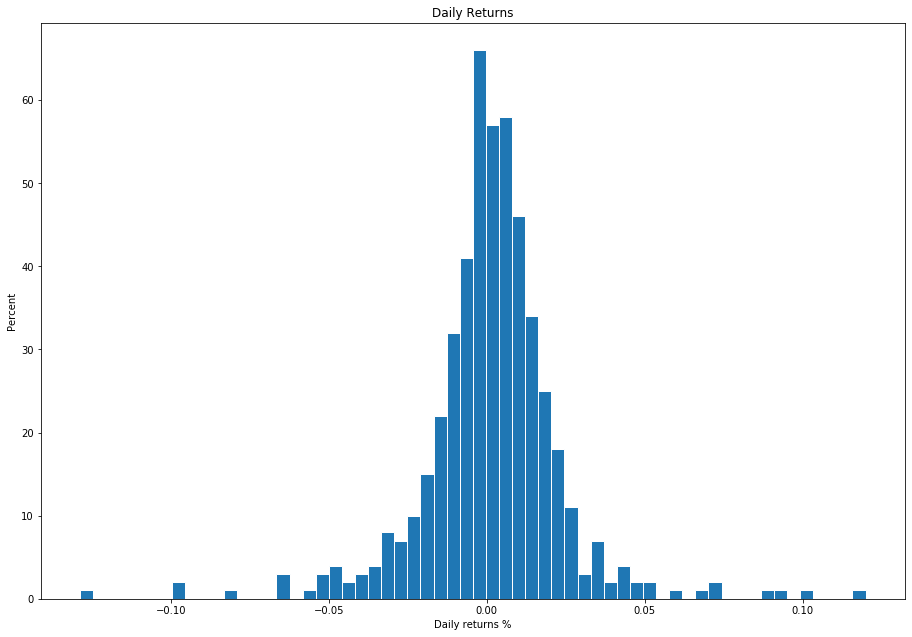

In [157]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
fig.set_size_inches(15.0, 10.0)
daily_returns.plot.hist(bins = 60, edgecolor='white')
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Daily Returns")
plt.show()

##### Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.

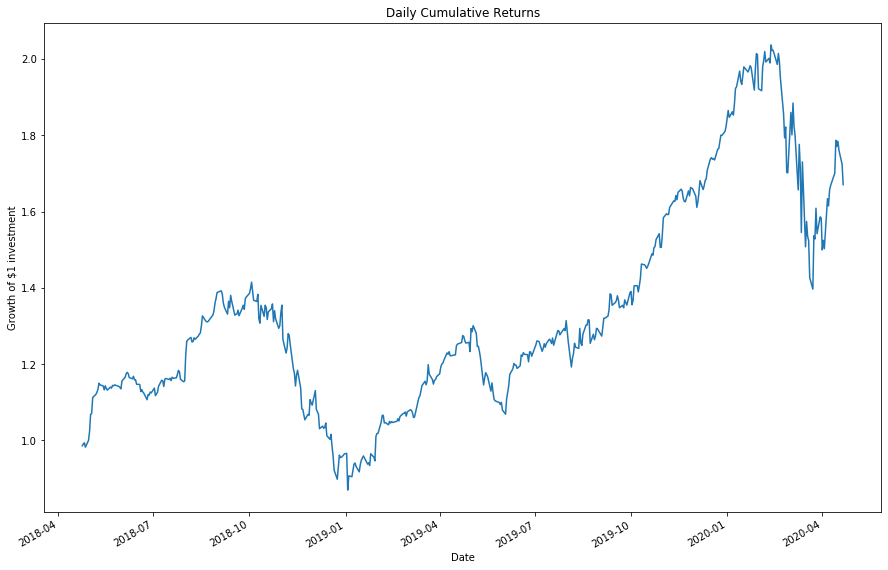

In [159]:
cumulative_returns = (daily_returns+1).cumprod()
fig= plt.figure(figsize=(15,10))
ax1 = cumulative_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily Cumulative Returns")
ax1